In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("nvidia_news_final_20251106_020225.csv")

In [ ]:
categories = {
    "financial_results": [
            (r"\bbeat\s+estimate\w*\b", 3.0),
            (r"\bmiss\s+estimate\w*\b", 3.0),
            (r"\bguidance\b", 3.0),
            (r"\bforecast\w*\b", 3.0),
            (r"\bquarterly\s+report\w*\b", 3.0),
            (r"\bannual\s+result\w*\b", 3.0),
            (r"\bearnings?\s+call\b", 3.0),
            (r"\bprofit\s+warning\b", 3.0),
            (r"\bdividend\s+announcement\b", 3.0),
            (r"\binterim\s+dividend\b", 3.0),
            (r"\bfinal\s+dividend\b", 3.0),
            (r"\bbuyback\b", 3.0),
            (r"\brepurchase\b", 3.0),
            (r"\bEPS\b", 3.0),
            (r"\bEBITDA\b", 3.0),
            (r"\bnet\s+income\w*\b", 3.0),
            (r"\boperating\s+profit\b", 3.0),

            (r"\brevenue\w*\b", 1.0),
            (r"\bprofit\w*\b", 1.0),
            (r"\bearn\w*\b", 1.0),
            (r"\bmargin\w*\b", 1.0),
            (r"\bcash\s+flow\w*\b", 1.0),
            (r"\bfree\s+cash\s+flow\b", 1.0),
            (r"\bdebt\w*\b", 1.0),
            (r"\bbalance\s+sheet\w*\b", 1.0),
            (r"\bincome\s+statement\b", 1.0),
            (r"\bP&L\b", 1.0),
            (r"\bprofit\w*\s+loss\b", 1.0),

            (r"\bfinancial\w*\b", 0.3),
            (r"\baccount\w*\b", 0.3),
            (r"\bconsolidat\w*\b", 0.3),
            (r"\bamortiz\w*\b", 0.3),
            (r"\bdepreciat\w*\b", 0.3),
            (r"\bgoodwill\b", 0.3),
            (r"\bsecurit\w*\b", 0.3),
            (r"\bderivative\w*\b", 0.3),
            #слова шумы
        (r"\brumour?\w*\b", -1.5),
        (r"\bhearsay\b", -1.5),
        (r"\bunconfirmed\b", -1.5),
        (r"\balleged\w*\b", -1.5),
        (r"\bwhisper\w*\b", -1.5),
        (r"\bgossip\w*\b", -1.5),
        (r"\bchatter\b", -1.5),

        (r"\bmight\b", -1.0),
        (r"\bcould\b", -1.0),
        (r"\bwould\b", -1.0),
        (r"\bshould\b", -1.0),
        (r"\bpossibly\b", -1.0),
        (r"\bpotentially\b", -1.0),
        (r"\bperhaps\b", -1.0),
        (r"\bmaybe\b", -1.0),
        (r"\bunlikely\b", -1.0),
        (r"\bdoubtful\b", -1.0),
        (r"\buncertain\w*\b", -1.0),

        (r"\bcommentary\b", -0.7),
        (r"\bopinion\w*\b", -0.7),
        (r"\bview\w*\b", -0.7),
        (r"\bperspective\w*\b", -0.7),
        (r"\boutlook\b", -0.7),
        (r"\bassessment\b", -0.7),
        (r"\bevaluation\b", -0.7),
        (r"\bappraisal\b", -0.7),

        (r"\bresistance\b", -0.5),
        (r"\bsupport\b", -0.5),
        (r"\bmoving average\b", -0.5),
        (r"\bRSI\b", -0.5),
        (r"\bMACD\b", -0.5),
        (r"\bBollinger\b", -0.5),
        (r"\bfibonacci\b", -0.5),
        (r"\bchart pattern\w*\b", -0.5),
        (r"\btechnical indicator\w*\b", -0.5),



        (r"\beventually\b", -0.3),
        (r"\bin the future\b", -0.3),
        (r"\bdown the road\b", -0.3),
        (r"\bin coming years\b", -0.3),
        (r"\blong.term\b", -0.3),
        (r"\bfuture prospect\w*\b", -0.3),
        (r"\bpotential growth\b", -0.3),
        ],

    "product_launches": [
            (r"\blaunch\w*\b", 3.0),
            (r"\breleas\w*\b", 3.0),
            (r"\bannounc\w*\b", 3.0),
            (r"\bunveil\w*\b", 3.0),
            (r"\bintroduc\w*\b", 3.0),
            (r"\bdebut\w*\b", 3.0),
            (r"\bpremier\w*\b", 3.0),
            (r"\bbreakthrough\w*\b", 3.0),
            (r"\brevolution\w*\b", 3.0),
            (r"\bgame.changer\b", 3.0),
            (r"\bindustry.first\b", 3.0),
            (r"\bHopper\b", 3.0),
            (r"\bBlackwell\b", 3.0),
            (r"\bGrace\b", 3.0),
            (r"\bDGX\s+\w+\b", 3.0),
            (r"\bHGX\s+\w+\b", 3.0),
            (r"\bGH200\b", 3.0),

            (r"\bproduct\w*\b", 1.0),
            (r"\bplatform\w*\b", 1.0),
            (r"\bframework\w*\b", 1.0),
            (r"\barchitecture\w*\b", 1.0),
            (r"\bgeneration\w*\b", 1.0),
            (r"\bmodel\w*\b", 1.0),
            (r"\bseries\w*\b", 1.0),
            (r"\bAI\b", 1.0),
            (r"\bartificial\s+intelligence\b", 1.0),
            (r"\bmachine\s+learning\b", 1.0),
            (r"\bdeep\s+learning\b", 1.0),
            (r"\bneural\s+network\w*\b", 1.0),
            (r"\bCUDA\b", 1.0),
            (r"\bOmniverse\b", 1.0),
            (r"\bJetson\b", 1.0),
            (r"\bRTX\b", 1.0),
            (r"\bGeforce\b", 1.0),

            (r"\binnov\w*\b", 0.3),
            (r"\bupdat\w*\b", 0.3),
            (r"\bprototype\w*\b", 0.3),
            (r"\bbeta\w*\b", 0.3),
            (r"\bdeploy\w*\b", 0.3),
            (r"\bdebug\w*\b", 0.3),
            (r"\bchip\w*\b", 0.3),
            (r"\bgpu\w*\b", 0.3),
            (r"\baccelerat\w*\b", 0.3),
            #слова шумы
        (r"\brumour?\w*\b", -1.5),
        (r"\bhearsay\b", -1.5),
        (r"\bunconfirmed\b", -1.5),
        (r"\balleged\w*\b", -1.5),
        (r"\bwhisper\w*\b", -1.5),
        (r"\bgossip\w*\b", -1.5),
        (r"\bchatter\b", -1.5),

        (r"\bmight\b", -1.0),
        (r"\bcould\b", -1.0),
        (r"\bwould\b", -1.0),
        (r"\bshould\b", -1.0),
        (r"\bpossibly\b", -1.0),
        (r"\bpotentially\b", -1.0),
        (r"\bperhaps\b", -1.0),
        (r"\bmaybe\b", -1.0),
        (r"\bunlikely\b", -1.0),
        (r"\bdoubtful\b", -1.0),
        (r"\buncertain\w*\b", -1.0),

        (r"\bcommentary\b", -0.7),
        (r"\bopinion\w*\b", -0.7),
        (r"\bview\w*\b", -0.7),
        (r"\bperspective\w*\b", -0.7),
        (r"\boutlook\b", -0.7),
        (r"\bassessment\b", -0.7),
        (r"\bevaluation\b", -0.7),
        (r"\bappraisal\b", -0.7),

        (r"\bresistance\b", -0.5),
        (r"\bsupport\b", -0.5),
        (r"\bmoving average\b", -0.5),
        (r"\bRSI\b", -0.5),
        (r"\bMACD\b", -0.5),
        (r"\bBollinger\b", -0.5),
        (r"\bfibonacci\b", -0.5),
        (r"\bchart pattern\w*\b", -0.5),
        (r"\btechnical indicator\w*\b", -0.5),



        (r"\beventually\b", -0.3),
        (r"\bin the future\b", -0.3),
        (r"\bdown the road\b", -0.3),
        (r"\bin coming years\b", -0.3),
        (r"\blong.term\b", -0.3),
        (r"\bfuture prospect\w*\b", -0.3),
        (r"\bpotential growth\b", -0.3),
        ],

    "mergers_acquisitions": [
            (r"\bacquir\w*\b", 3.0),
            (r"\bmerg\w*\b", 3.0),
            (r"\btakeover\w*\b", 3.0),
            (r"\bbuyout\w*\b", 3.0),
            (r"\bM&A\b", 3.0),
            (r"\bacquire\w*\b", 3.0),
            (r"\bdeal\s+close\w*\b", 3.0),
            (r"\btransaction\s+complete\w*\b", 3.0),
            (r"\bapprov\w*\b", 3.0),
            (r"\bregulatory\s+approval\b", 3.0),
            (r"\bIPO\b", 3.0),
            (r"\bSPAC\b", 3.0),
            (r"\bleveraged\s+buyout\b", 3.0),
            (r"\bprivate\s+equity\b", 3.0),

            (r"\binvest\w*\b", 1.0),
            (r"\bventure\w*\b", 1.0),
            (r"\bjoint\s+venture\w*\b", 1.0),
            (r"\bpartnership\w*\b", 1.0),
            (r"\bstrategic\s+deal\w*\b", 1.0),
            (r"\bstake\w*\b", 1.0),
            (r"\bspin.off\w*\b", 1.0),
            (r"\bdivest\w*\b", 1.0),
            (r"\bconsolidat\w*\b", 1.0),
            (r"\bcollaborat\w*\b", 1.0),

            (r"\bfundrais\w*\b", 0.3),
            (r"\bterm\s+sheet\w*\b", 0.3),
            (r"\bshare\s+purchas\w*\b", 0.3),
            (r"\basset\s+purchas\w*\b", 0.3),
            (r"\bexit\w*\b", 0.3),
            #слова шумы
        (r"\brumour?\w*\b", -1.5),
        (r"\bhearsay\b", -1.5),
        (r"\bunconfirmed\b", -1.5),
        (r"\balleged\w*\b", -1.5),
        (r"\bwhisper\w*\b", -1.5),
        (r"\bgossip\w*\b", -1.5),
        (r"\bchatter\b", -1.5),

        (r"\bmight\b", -1.0),
        (r"\bcould\b", -1.0),
        (r"\bwould\b", -1.0),
        (r"\bshould\b", -1.0),
        (r"\bpossibly\b", -1.0),
        (r"\bpotentially\b", -1.0),
        (r"\bperhaps\b", -1.0),
        (r"\bmaybe\b", -1.0),
        (r"\bunlikely\b", -1.0),
        (r"\bdoubtful\b", -1.0),
        (r"\buncertain\w*\b", -1.0),

        (r"\bcommentary\b", -0.7),
        (r"\bopinion\w*\b", -0.7),
        (r"\bview\w*\b", -0.7),
        (r"\bperspective\w*\b", -0.7),
        (r"\boutlook\b", -0.7),
        (r"\bassessment\b", -0.7),
        (r"\bevaluation\b", -0.7),
        (r"\bappraisal\b", -0.7),

        (r"\bresistance\b", -0.5),
        (r"\bsupport\b", -0.5),
        (r"\bmoving average\b", -0.5),
        (r"\bRSI\b", -0.5),
        (r"\bMACD\b", -0.5),
        (r"\bBollinger\b", -0.5),
        (r"\bfibonacci\b", -0.5),
        (r"\bchart pattern\w*\b", -0.5),
        (r"\btechnical indicator\w*\b", -0.5),



        (r"\beventually\b", -0.3),
        (r"\bin the future\b", -0.3),
        (r"\bdown the road\b", -0.3),
        (r"\bin coming years\b", -0.3),
        (r"\blong.term\b", -0.3),
        (r"\bfuture prospect\w*\b", -0.3),
        (r"\bpotential growth\b", -0.3),
        ],

    "regulatory_legal":[
            (r"\bfine\w*\b", 3.0),
            (r"\bpenalt\w*\b", 3.0),
            (r"\bsanction\w*\b", 3.0),
            (r"\bverdict\w*\b", 3.0),
            (r"\bruling\w*\b", 3.0),
            (r"\bjudgment\w*\b", 3.0),
            (r"\bantitrust\w*\b", 3.0),
            (r"\bDOJ\b", 3.0),
            (r"\bSEC\b", 3.0),
            (r"\bFTC\b", 3.0),
            (r"\binvestigat\w*\b", 3.0),
            (r"\blawsuit\w*\b", 3.0),
            (r"\blitigation\w*\b", 3.0),
            (r"\bclass\s+action\w*\b", 3.0),
            (r"\bsettlement\w*\b", 3.0),

            (r"\bcourt\w*\b", 1.0),
            (r"\btrial\w*\b", 1.0),
            (r"\blegal\w*\b", 1.0),
            (r"\battorney\w*\b", 1.0),
            (r"\bappeal\w*\b", 1.0),
            (r"\bregulat\w*\b", 1.0),
            (r"\blicens\w*\b", 1.0),
            (r"\bcompliance\w*\b", 1.0),
            (r"\bviolat\w*\b", 1.0),

            (r"\bjurisdiction\w*\b", 0.3),
            (r"\bcontract\w*\b", 0.3),
            (r"\bagreement\w*\b", 0.3),
            (r"\bbreach\w*\b", 0.3),
            (r"\bsummon\w*\b", 0.3),
            (r"\bsue\w*\b", 0.3),

            #слова добавленные из макроэкономики
            (r"\binflation\w*\b", 3.0),
            (r"\brecession\w*\b", 3.0),
            (r"\bcrisis\w*\b", 3.0),
            (r"\binterest\s+rate\w*\b", 3.0),
            (r"\bmonetary\s+policy\b", 3.0),
            (r"\bchip\s+shortage\w*\b", 3.0),
            (r"\bsupply\s+chain\w*\b", 3.0),
            (r"\btariff\w*\b", 3.0),
            (r"\btrade\s+war\w*\b", 3.0),
            (r"\bgeopolitical\w*\b", 3.0),

            (r"\bGDP\s+growth\b", 1.0),
            (r"\bunemployment\s+rate\w*\b", 1.0),
            (r"\bexchange\s+rate\w*\b", 1.0),
            (r"\bconsumer\s+spending\b", 1.0),
            (r"\bfiscal\s+policy\b", 1.0),
            (r"\bcentral\s+bank\w*\b", 1.0),
            (r"\bquantitative\s+easing\b", 1.0),

            (r"\bcommodity\s+price\w*\b", 0.3),
            (r"\braw\s+material\w*\b", 0.3),
            (r"\binvestment\s+inflow\w*\b", 0.3),
            (r"\boutflow\w*\b", 0.3),
            (r"\bpublic\s+debt\b", 0.3),
            (r"\bbudget\s+deficit\w*\b", 0.3),
            #слова шумы
        (r"\brumour?\w*\b", -1.5),
        (r"\bhearsay\b", -1.5),
        (r"\bunconfirmed\b", -1.5),
        (r"\balleged\w*\b", -1.5),
        (r"\bwhisper\w*\b", -1.5),
        (r"\bgossip\w*\b", -1.5),
        (r"\bchatter\b", -1.5),

        (r"\bmight\b", -1.0),
        (r"\bcould\b", -1.0),
        (r"\bwould\b", -1.0),
        (r"\bshould\b", -1.0),
        (r"\bpossibly\b", -1.0),
        (r"\bpotentially\b", -1.0),
        (r"\bperhaps\b", -1.0),
        (r"\bmaybe\b", -1.0),
        (r"\bunlikely\b", -1.0),
        (r"\bdoubtful\b", -1.0),
        (r"\buncertain\w*\b", -1.0),

        (r"\bcommentary\b", -0.7),
        (r"\bopinion\w*\b", -0.7),
        (r"\bview\w*\b", -0.7),
        (r"\bperspective\w*\b", -0.7),
        (r"\boutlook\b", -0.7),
        (r"\bassessment\b", -0.7),
        (r"\bevaluation\b", -0.7),
        (r"\bappraisal\b", -0.7),

        (r"\bresistance\b", -0.5),
        (r"\bsupport\b", -0.5),
        (r"\bmoving average\b", -0.5),
        (r"\bRSI\b", -0.5),
        (r"\bMACD\b", -0.5),
        (r"\bBollinger\b", -0.5),
        (r"\bfibonacci\b", -0.5),
        (r"\bchart pattern\w*\b", -0.5),
        (r"\btechnical indicator\w*\b", -0.5),



        (r"\beventually\b", -0.3),
        (r"\bin the future\b", -0.3),
        (r"\bdown the road\b", -0.3),
        (r"\bin coming years\b", -0.3),
        (r"\blong.term\b", -0.3),
        (r"\bfuture prospect\w*\b", -0.3),
        (r"\bpotential growth\b", -0.3),
        ],

    "scandals": [
            (r"\bfraud\w*\b", 3.0),
            (r"\bembezzl\w*\b", 3.0),
            (r"\bbrib\w*\b", 3.0),
            (r"\bcorrupt\w*\b", 3.0),
            (r"\binsider\s+trad\w*\b", 3.0),
            (r"\bmoney\s+laund\w*\b", 3.0),
            (r"\btax\s+evad\w*\b", 3.0),
            (r"\bscandal\w*\b", 3.0),
            (r"\bcover.up\w*\b", 3.0),
            (r"\bwhistleblow\w*\b", 3.0),
            (r"\bmisconduct\w*\b", 3.0),

            (r"\bfalsif\w*\b", 1.0),
            (r"\bforg\w*\b", 1.0),
            (r"\bcheat\w*\b", 1.0),
            (r"\bscam\w*\b", 1.0),
            (r"\bdecept\w*\b", 1.0),
            (r"\bmanipulat\w*\b", 1.0),
            (r"\bdata\s+leak\w*\b", 1.0),
            (r"\bprivacy\s+breach\w*\b", 1.0),

            (r"\bblackmail\w*\b", 0.3),
            (r"\bextort\w*\b", 0.3),
            (r"\bfake\w*\b", 0.3),
            (r"\bmalpractic\w*\b", 0.3),
            (r"\bnegligenc\w*\b", 0.3),
            (r"\bethical\s+violat\w*\b", 0.3),
            #слова шумы
        (r"\brumour?\w*\b", -1.5),
        (r"\bhearsay\b", -1.5),
        (r"\bunconfirmed\b", -1.5),
        (r"\balleged\w*\b", -1.5),
        (r"\bwhisper\w*\b", -1.5),
        (r"\bgossip\w*\b", -1.5),
        (r"\bchatter\b", -1.5),

        (r"\bmight\b", -1.0),
        (r"\bcould\b", -1.0),
        (r"\bwould\b", -1.0),
        (r"\bshould\b", -1.0),
        (r"\bpossibly\b", -1.0),
        (r"\bpotentially\b", -1.0),
        (r"\bperhaps\b", -1.0),
        (r"\bmaybe\b", -1.0),
        (r"\bunlikely\b", -1.0),
        (r"\bdoubtful\b", -1.0),
        (r"\buncertain\w*\b", -1.0),

        (r"\bcommentary\b", -0.7),
        (r"\bopinion\w*\b", -0.7),
        (r"\bview\w*\b", -0.7),
        (r"\bperspective\w*\b", -0.7),
        (r"\boutlook\b", -0.7),
        (r"\bassessment\b", -0.7),
        (r"\bevaluation\b", -0.7),
        (r"\bappraisal\b", -0.7),

        (r"\bresistance\b", -0.5),
        (r"\bsupport\b", -0.5),
        (r"\bmoving average\b", -0.5),
        (r"\bRSI\b", -0.5),
        (r"\bMACD\b", -0.5),
        (r"\bBollinger\b", -0.5),
        (r"\bfibonacci\b", -0.5),
        (r"\bchart pattern\w*\b", -0.5),
        (r"\btechnical indicator\w*\b", -0.5),



        (r"\beventually\b", -0.3),
        (r"\bin the future\b", -0.3),
        (r"\bdown the road\b", -0.3),
        (r"\bin coming years\b", -0.3),
        (r"\blong.term\b", -0.3),
        (r"\bfuture prospect\w*\b", -0.3),
        (r"\bpotential growth\b", -0.3),
        ],

    "competitors": [
            (r"\bprice\s+war\w*\b", 3.0),
            (r"\bmarket\s+share\w*\b", 3.0),
            (r"\bcompetit\w*\b", 3.0),
            (r"\brival\w*\b", 3.0),
            (r"\bdomin\w*\b", 3.0),
            (r"\bovertak\w*\b", 3.0),
            (r"\bsurpass\w*\b", 3.0),
            (r"\bbeat\s+rival\w*\b", 3.0),
            (r"\blosing\s+market\b", 3.0),
            (r"\bgain\s+market\b", 3.0),

            (r"\bmonopol\w*\b", 1.0),
            (r"\boligopol\w*\b", 1.0),
            (r"\bmarket\s+disrupt\w*\b", 1.0),
            (r"\bpricing\s+strateg\w*\b", 1.0),
            (r"\bcompetitive\s+edge\b", 1.0),
            (r"\bcompetitive\s+advan\w*\b", 1.0),
            (r"\bretaliat\w*\b", 1.0),

            (r"\bundercut\w*\b", 0.3),
            (r"\bchallenge\w*\b", 0.3),
            (r"\bsubstitut\w*\b", 0.3),
            (r"\bnew\s+entrant\w*\b", 0.3),
            (r"\bcustomer\s+loss\w*\b", 0.3),
            (r"\bclient\s+switch\w*\b", 0.3),

            #слова шумы
        (r"\brumour?\w*\b", -1.5),
        (r"\bhearsay\b", -1.5),
        (r"\bunconfirmed\b", -1.5),
        (r"\balleged\w*\b", -1.5),
        (r"\bwhisper\w*\b", -1.5),
        (r"\bgossip\w*\b", -1.5),
        (r"\bchatter\b", -1.5),

        (r"\bmight\b", -1.0),
        (r"\bcould\b", -1.0),
        (r"\bwould\b", -1.0),
        (r"\bshould\b", -1.0),
        (r"\bpossibly\b", -1.0),
        (r"\bpotentially\b", -1.0),
        (r"\bperhaps\b", -1.0),
        (r"\bmaybe\b", -1.0),
        (r"\bunlikely\b", -1.0),
        (r"\bdoubtful\b", -1.0),
        (r"\buncertain\w*\b", -1.0),

        (r"\bcommentary\b", -0.7),
        (r"\bopinion\w*\b", -0.7),
        (r"\bview\w*\b", -0.7),
        (r"\bperspective\w*\b", -0.7),
        (r"\boutlook\b", -0.7),
        (r"\bassessment\b", -0.7),
        (r"\bevaluation\b", -0.7),
        (r"\bappraisal\b", -0.7),

        (r"\bresistance\b", -0.5),
        (r"\bsupport\b", -0.5),
        (r"\bmoving average\b", -0.5),
        (r"\bRSI\b", -0.5),
        (r"\bMACD\b", -0.5),
        (r"\bBollinger\b", -0.5),
        (r"\bfibonacci\b", -0.5),
        (r"\bchart pattern\w*\b", -0.5),
        (r"\btechnical indicator\w*\b", -0.5),



        (r"\beventually\b", -0.3),
        (r"\bin the future\b", -0.3),
        (r"\bdown the road\b", -0.3),
        (r"\bin coming years\b", -0.3),
        (r"\blong.term\b", -0.3),
        (r"\bfuture prospect\w*\b", -0.3),
        (r"\bpotential growth\b", -0.3),
        ]
}
max_chars = 10000


In [ ]:
df

,publish_date,title,content,author,topic,preview,url
0,11/5/2025 1:17:34 PM,Here are the Wednesday’s biggest analyst calls...,Текст не найден,Michael Bloom,Analyst Calls of the Day,Here are the biggest calls on Wall Street on W...,https://www.cnbc.com/2025/11/05/analyst-calls-...
1,11/5/2025 12:49:36 PM,"Election results, McDonald’s earnings, AI valu...",This is CNBC's Morning Squawk newsletter. Subs...,Josephine Rozzelle,5 Things to Know,This is CNBC’s Morning Squawk newsletter. Subs...,https://www.cnbc.com/2025/11/05/5-things-to-kn...
2,11/5/2025 8:57:52 AM,CNBC’s The China Connection newsletter: Rumbli...,"Monday - Friday, 10:00 - 11:00 SIN/HK | 0400...",Evelyn Cheng,The China Connection,This report is from this week’s CNBC’s The Chi...,https://www.cnbc.com/2025/11/05/cnbcs-the-chin...
3,11/5/2025 6:21:01 AM,CNBC Daily Open: When AI hype hits gravity,"Taken from CNBC’s Daily Open, our internationa...",Lim Hui Jie,Daily Open,The euphoria around artificial intelligence is...,https://www.cnbc.com/2025/11/05/cnbc-daily-ope...
4,11/5/2025 3:30:01 AM,Nvidia deepens India footprint with $2 billion...,Nvidia will help train and mentor emerging dee...,Priyanka Salve,Technology,Nvidia will help train and mentor emerging dee...,https://www.cnbc.com/2025/11/04/nvidia-joins-2...
...,...,...,...,...,...,...,...
10095,12/6/2021 2:01:39 PM,What to watch today: Dow set to rebound after ...,Dow futures rebounded Monday following a rolle...,Matthew J. Belvedere,morning brief,BY THE NUMBERSDow futures rebounded Monday fol...,https://www.cnbc.com/2021/12/06/what-to-watch-...
10096,12/6/2021 1:37:01 PM,Here are Monday’s biggest analyst calls of the...,Текст не найден,Michael Bloom,Pro: Street Calls,Here are the biggest calls on Wall Street on M...,https://www.cnbc.com/2021/12/06/monday-wall-st...
10097,12/6/2021 1:01:47 PM,Stocks making the biggest moves premarket: Koh...,Check out the companies making headlines befor...,Peter Schacknow,Market Insider,Check out the companies making headlines befor...,https://www.cnbc.com/2021/12/06/stocks-making-...
10098,12/6/2021 11:05:12 AM,Tech giant SoftBank’s shares get hit as Alibab...,SoftBank Group shares fell by more than 8% Mon...,Sam Shead,Technology,SoftBank Group shares fell by more than 8% Mon...,https://www.cnbc.com/2021/12/06/softbank-share...


In [ ]:
import re

df["content_clean"] = df["content"].str.lower()
df["content_clean"] = df["content_clean"].fillna("Текст не найден")
for category, patterns in categories.items():
    df[category] = df["content_clean"].apply(
        lambda text: sum(
            weight for pattern, weight in patterns
            if re.search(pattern, text[:max_chars])
        )
    )

In [ ]:
df["title_clean"] = df["title"].str.lower()
for category, patterns in categories.items():
    df[category] += df["title_clean"].apply(
        lambda text: sum(
            weight * 2 for pattern, weight in patterns # вот здесь множитель веса для заголовка
            if re.search(pattern, text[:max_chars])
        )
    )

In [ ]:
#print(sum(df['financial_results']))
print(len(df[df['financial_results']>0]))
#print(sum(df['product_launches']))
print(len(df[df['product_launches']!=0]))
#print(sum(df['mergers_acquisitions']))
print(len(df[df['mergers_acquisitions']!=0]))
#print(sum(df['regulatory_legal']))
print(len(df[df['regulatory_legal']!=0]))
#print(sum(df['scandals']))
print(len(df[df['scandals']!=0]))
#print(sum(df['competitors']))
print(len(df[df['competitors']!=0]))

2662
4764
4415
3984
3658
3877


# **EDA**

# EDA новостей по категориям, анализ распределений.

In [ ]:
print(len(df[df['financial_results']<0]))
print(len(df[df['financial_results']>0]))

2102
2662


In [ ]:
print(len(df[df['product_launches']<0]))
print(len(df[df['product_launches']>0]))


1362
3402


In [ ]:
print(len(df[df['mergers_acquisitions']<0]))
print(len(df[df['mergers_acquisitions']>0]))

2216
2199


In [ ]:
print(len(df[df['regulatory_legal']<0]))
print(len(df[df['regulatory_legal']>0]))

1889
2095


In [ ]:
print(len(df[df['scandals']<0]))
print(len(df[df['scandals']>0]))
#print(df[df['scandals']<0])
pd.options.display.expand_frame_repr = False
df_sorted = df.sort_values('mergers_acquisitions')
print(df_sorted)
positive_data = pd.DataFrame(df)


3499
159
                 publish_date                                              title                                            content               author                    topic                                            preview                                                url                                      content_clean  financial_results  product_launches  mergers_acquisitions  regulatory_legal  scandals  competitors                                        title_clean
758       9/5/2025 2:39:22 PM  How to protect your record 2025 stock market p...  There is more than enough focus on Wall Street...       Eric Rosenbaum                 ETF Edge  There is more than enough focus on Wall Street...  https://www.cnbc.com/2025/09/05/stock-market-i...  there is more than enough focus on wall street...               -8.1              -9.0                  -8.0               7.0      -9.0         -6.0  how to protect your record 2025 stock market p...
1957      5/8/2025 1:12:39 

In [ ]:
print(len(df[df['competitors']<0]))
print(len(df[df['competitors']>0]))

2596
1281


In [ ]:
sort_fin = df.sort_values("financial_results")
sort_fin


,publish_date,title,content,author,topic,preview,url,content_clean,financial_results,product_launches,mergers_acquisitions,regulatory_legal,scandals,competitors,title_clean
758,9/5/2025 2:39:22 PM,How to protect your record 2025 stock market p...,There is more than enough focus on Wall Street...,Eric Rosenbaum,ETF Edge,There is more than enough focus on Wall Street...,https://www.cnbc.com/2025/09/05/stock-market-i...,there is more than enough focus on wall street...,-8.1,-9.0,-8.0,7.0,-9.0,-6.0,how to protect your record 2025 stock market p...
9926,2/24/2022 1:03:13 PM,From semiconductors to payments: How the world...,As Russia launches an unprecedented invasion o...,Sam Shead,Technology,As Russia launches an unprecedented invasion o...,https://www.cnbc.com/2022/02/24/russia-ukraine...,as russia launches an unprecedented invasion o...,-7.7,-3.4,-5.0,4.0,-8.0,-8.0,from semiconductors to payments: how the world...
7386,11/22/2023 12:32:46 AM,Cramer broadly agrees with Bank of America’s b...,"Monday - Friday, 6:00 - 7:00 PM ET CNBC's Jim ...",Julie Coleman,Mad Money,CNBC’s Jim Cramer on Tuesday reacted to Bank o...,https://www.cnbc.com/2023/11/21/cramer-agrees-...,"monday - friday, 6:00 - 7:00 pm et cnbc's jim ...",-7.0,-7.0,-3.0,-1.0,-7.0,-4.0,cramer broadly agrees with bank of america’s b...
4044,9/19/2024 5:03:46 AM,China would love a domestic Nvidia rival — but...,Chinese companies are ramping up efforts to pr...,Arjun Kharpal,Technology,Chinese companies are ramping up efforts to pr...,https://www.cnbc.com/2024/09/19/china-looks-fo...,chinese companies are ramping up efforts to pr...,-6.9,2.7,-7.2,-4.2,-7.2,5.7,china would love a domestic nvidia rival — but...
1922,5/13/2025 11:43:26 AM,Op-ed: What comes next in U.S.-China trade tal...,"To learn more about the CNBC CFO Council, visi...",Dewardric L. McNeal,CNBC Global CFO Council,The U.S.-China trade truce reached in Geneva w...,https://www.cnbc.com/2025/05/13/what-comes-nex...,"to learn more about the cnbc cfo council, visi...",-6.4,0.2,-6.7,11.3,-6.7,-2.4,op-ed: what comes next in u.s.-china trade tal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,4/17/2025 5:36:38 AM,TSMC sticks with its revenue forecast after pr...,Taiwan Semiconductor Manufacturing Company on ...,Dylan Butts,Technology,Taiwan Semiconductor Manufacturing Company on ...,https://www.cnbc.com/2025/04/17/tsmc-first-qua...,taiwan semiconductor manufacturing company on ...,19.3,2.3,0.0,4.3,-3.0,-3.0,tsmc sticks with its revenue forecast after pr...
2828,2/6/2025 5:00:01 PM,"Amazon issues disappointing revenue forecast, ...",Amazon reported better-than-expected earnings ...,Annie Palmer,Technology,Amazon reported better-than-expected earnings ...,https://www.cnbc.com/2025/02/06/amazon-amzn-q4...,amazon reported better-than-expected earnings ...,19.5,10.5,-0.8,-0.8,-1.8,4.2,"amazon issues disappointing revenue forecast, ..."
6382,2/28/2024 9:15:23 PM,Salesforce beats on earnings but forecasts sin...,Salesforce shares initially slid as much as 6%...,Jordan Novet,Technology,Salesforce shares initially slid as much as 6%...,https://www.cnbc.com/2024/02/28/salesforce-crm...,salesforce shares initially slid as much as 6%...,20.0,3.0,5.0,-2.0,-2.0,-2.0,salesforce beats on earnings but forecasts sin...
4625,7/31/2024 4:00:01 PM,"Meta shares pop on revenue and earnings beat, ...",Meta shares jumped about 7% in extended tradin...,Jonathan Vanian,Technology,Meta shares jumped about 7% in extended tradin...,https://www.cnbc.com/2024/07/31/meta-earnings-...,meta shares jumped about 7% in extended tradin...,20.1,7.4,-1.2,1.1,-2.2,3.8,"meta shares pop on revenue and earnings beat, ..."


In [ ]:
stats = df[['financial_results', 'product_launches', 'mergers_acquisitions',
            'regulatory_legal', 'scandals', 'competitors']].describe()
df.columns

Index(['publish_date', 'title', 'content', 'author', 'topic', 'preview', 'url',
       'content_clean', 'financial_results', 'product_launches',
       'mergers_acquisitions', 'regulatory_legal', 'scandals', 'competitors',
       'title_clean'],
      dtype='object')

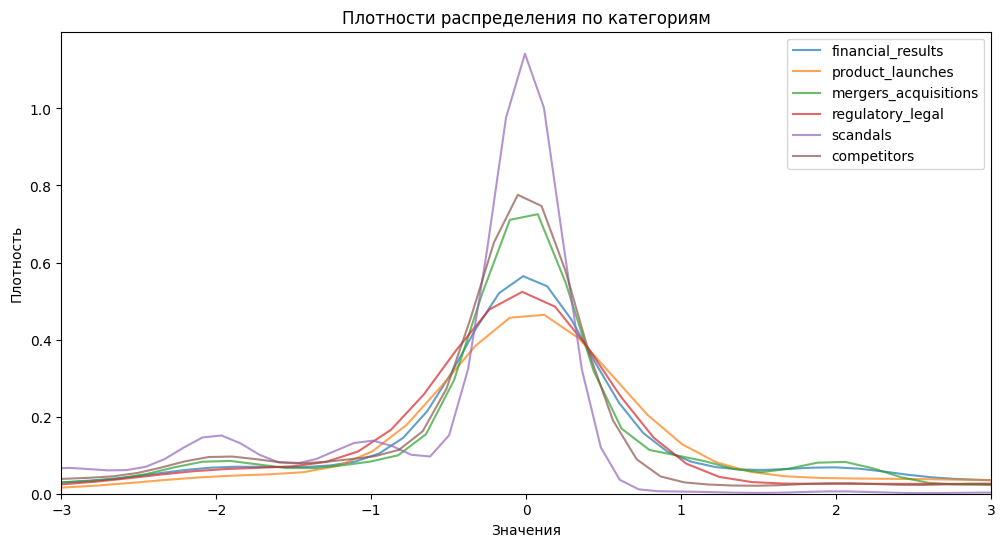

In [ ]:
plt.figure(figsize=(12, 6))

columns = ['financial_results', 'product_launches', 'mergers_acquisitions',
           'regulatory_legal', 'scandals', 'competitors']
positive_df = pd.DataFrame()
for col in columns:
    positive_values = df[col]
    positive_df[col + '_positive'] = positive_values

    sns.kdeplot(positive_values, label=col, alpha=0.7)
plt.xlim(-3, 3)
plt.title('Плотности распределения по категориям')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.legend()
plt.show()

In [ ]:
columns_category = ['financial_results',	'product_launches',	'mergers_acquisitions',	'regulatory_legal',	'scandals',	'competitors']
count_df=df.copy()
print(type(df))

count_df['competitors'] = (count_df['competitors'] > 8).astype(int)
count_df['scandals'] = (count_df['scandals'] > 3).astype(int)
count_df['regulatory_legal'] = (count_df['regulatory_legal'] > 13).astype(int)
count_df['mergers_acquisitions'] = (count_df['mergers_acquisitions'] > 7).astype(int)
count_df['product_launches'] = (count_df['product_launches'] > 13).astype(int)
count_df['financial_results'] = (count_df['financial_results'] > 10.1).astype(int)


for col in columns_category:
  print(sum(count_df[col])/len(df[df[col] > 0]), col)

count_df

<class 'pandas.core.frame.DataFrame'>
0.058602554470323066 financial_results
0.04056437389770723 product_launches
0.05911778080945884 mergers_acquisitions
0.0558472553699284 regulatory_legal
0.20754716981132076 scandals
0.07181889149102264 competitors


,publish_date,title,content,author,topic,preview,url,content_clean,financial_results,product_launches,mergers_acquisitions,regulatory_legal,scandals,competitors,title_clean
0,11/5/2025 1:17:34 PM,Here are the Wednesday’s biggest analyst calls...,Текст не найден,Michael Bloom,Analyst Calls of the Day,Here are the biggest calls on Wall Street on W...,https://www.cnbc.com/2025/11/05/analyst-calls-...,текст не найден,0,0,0,0,0,0,here are the wednesday’s biggest analyst calls...
1,11/5/2025 12:49:36 PM,"Election results, McDonald’s earnings, AI valu...",This is CNBC's Morning Squawk newsletter. Subs...,Josephine Rozzelle,5 Things to Know,This is CNBC’s Morning Squawk newsletter. Subs...,https://www.cnbc.com/2025/11/05/5-things-to-kn...,this is cnbc's morning squawk newsletter. subs...,0,0,0,0,0,0,"election results, mcdonald’s earnings, ai valu..."
2,11/5/2025 8:57:52 AM,CNBC’s The China Connection newsletter: Rumbli...,"Monday - Friday, 10:00 - 11:00 SIN/HK | 0400...",Evelyn Cheng,The China Connection,This report is from this week’s CNBC’s The Chi...,https://www.cnbc.com/2025/11/05/cnbcs-the-chin...,"monday - friday, 10:00 - 11:00 sin/hk | 0400...",0,0,0,0,0,0,cnbc’s the china connection newsletter: rumbli...
3,11/5/2025 6:21:01 AM,CNBC Daily Open: When AI hype hits gravity,"Taken from CNBC’s Daily Open, our internationa...",Lim Hui Jie,Daily Open,The euphoria around artificial intelligence is...,https://www.cnbc.com/2025/11/05/cnbc-daily-ope...,"taken from cnbc’s daily open, our internationa...",0,0,0,0,0,0,cnbc daily open: when ai hype hits gravity
4,11/5/2025 3:30:01 AM,Nvidia deepens India footprint with $2 billion...,Nvidia will help train and mentor emerging dee...,Priyanka Salve,Technology,Nvidia will help train and mentor emerging dee...,https://www.cnbc.com/2025/11/04/nvidia-joins-2...,nvidia will help train and mentor emerging dee...,0,0,0,0,0,0,nvidia deepens india footprint with $2 billion...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,12/6/2021 2:01:39 PM,What to watch today: Dow set to rebound after ...,Dow futures rebounded Monday following a rolle...,Matthew J. Belvedere,morning brief,BY THE NUMBERSDow futures rebounded Monday fol...,https://www.cnbc.com/2021/12/06/what-to-watch-...,dow futures rebounded monday following a rolle...,0,0,1,0,0,0,what to watch today: dow set to rebound after ...
10096,12/6/2021 1:37:01 PM,Here are Monday’s biggest analyst calls of the...,Текст не найден,Michael Bloom,Pro: Street Calls,Here are the biggest calls on Wall Street on M...,https://www.cnbc.com/2021/12/06/monday-wall-st...,текст не найден,0,0,0,0,0,0,here are monday’s biggest analyst calls of the...
10097,12/6/2021 1:01:47 PM,Stocks making the biggest moves premarket: Koh...,Check out the companies making headlines befor...,Peter Schacknow,Market Insider,Check out the companies making headlines befor...,https://www.cnbc.com/2021/12/06/stocks-making-...,check out the companies making headlines befor...,0,0,1,0,0,0,stocks making the biggest moves premarket: koh...
10098,12/6/2021 11:05:12 AM,Tech giant SoftBank’s shares get hit as Alibab...,SoftBank Group shares fell by more than 8% Mon...,Sam Shead,Technology,SoftBank Group shares fell by more than 8% Mon...,https://www.cnbc.com/2021/12/06/softbank-share...,softbank group shares fell by more than 8% mon...,0,0,0,0,0,0,tech giant softbank’s shares get hit as alibab...


In [ ]:
row_sums = count_df[columns_category].sum(axis=1)
non_zero_indices = row_sums[row_sums > 0].index

count_df_filtered = count_df.loc[non_zero_indices]
news_data = df.loc[non_zero_indices]

news_data

,publish_date,title,content,author,topic,preview,url,content_clean,financial_results,product_launches,mergers_acquisitions,regulatory_legal,scandals,competitors,title_clean
8,11/4/2025 9:41:24 PM,AMD reports better-than-expected results but m...,Advanced Micro Devices reported fiscal third-q...,Jordan Novet,Technology,Advanced Micro Devices reported fiscal third-q...,https://www.cnbc.com/2025/11/04/amd-q3-earning...,advanced micro devices reported fiscal third-q...,15.0,7.2,1.0,0.0,-1.0,-1.0,amd reports better-than-expected results but m...
25,11/3/2025 9:07:02 PM,"Palantir tops estimates, boosts fourth-quarter...",Palantir reported quarterly results that toppe...,Samantha Subin,Technology,Palantir reported quarterly results that toppe...,https://www.cnbc.com/2025/11/03/palantir-pltr-...,palantir reported quarterly results that toppe...,16.0,2.0,1.0,-1.7,-2.0,-2.0,"palantir tops estimates, boosts fourth-quarter..."
28,11/3/2025 5:48:18 PM,"Lambda, Microsoft agree to multibillion-dollar...",Cloud computing startup Lambda announced on Mo...,Jaures Yip,Technology,Cloud computing startup Lambda announced on Mo...,https://www.cnbc.com/2025/11/03/lambda-ai-micr...,cloud computing startup lambda announced on mo...,-0.3,13.2,0.7,0.0,-0.3,-0.3,"lambda, microsoft agree to multibillion-dollar..."
38,11/3/2025 12:44:27 PM,Nvidia stock climbs 2% as U.S. approves chip s...,Microsoft said Monday it has secured export li...,April Roach,Technology,Microsoft said Monday it has secured export li...,https://www.cnbc.com/2025/11/03/nvidia-shares-...,microsoft said monday it has secured export li...,-1.0,4.8,9.0,0.0,-1.0,2.0,nvidia stock climbs 2% as u.s. approves chip s...
64,10/31/2025 6:58:49 AM,European markets end lower Friday as investors...,LONDON — European markets closed lower on Frid...,Tasmin Lockwood,Markets,LONDON — European markets closed lower on Frid...,https://www.cnbc.com/2025/10/31/european-marke...,london — european markets closed lower on frid...,4.0,3.9,3.0,13.3,0.0,0.0,european markets end lower friday as investors...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,12/16/2021 12:24:34 PM,Art Cashin sees inflation peaking soon and oth...,You have to hand it to UBS' Art Cashin. He lo...,Bob Pisani,Trader Talk,You have to hand it to UBS’ Art Cashin. He lov...,https://www.cnbc.com/2021/12/16/art-cashin-see...,you have to hand it to ubs' art cashin. he lo...,-3.4,-3.4,-4.4,15.6,-3.4,-4.1,art cashin sees inflation peaking soon and oth...
10083,12/14/2021 11:41:11 AM,French billionaire amasses 18% stake in UK tel...,LONDON — French billionaire Patrick Drahi has ...,Ryan Browne,Technology,LONDON — French billionaire Patrick Drahi has ...,https://www.cnbc.com/2021/12/14/french-billion...,london — french billionaire patrick drahi has ...,-0.7,0.3,21.0,-1.0,-1.0,-1.0,french billionaire amasses 18% stake in uk tel...
10092,12/7/2021 11:26:11 AM,Intel plans to take self-driving car unit publ...,Intel has announced that it plans to list Mobi...,Sam Shead,Technology,Intel has announced that it plans to list Mobi...,https://www.cnbc.com/2021/12/07/intel-plans-to...,intel has announced that it plans to list mobi...,0.5,3.8,8.5,-1.5,-1.5,-1.5,intel plans to take self-driving car unit publ...
10095,12/6/2021 2:01:39 PM,What to watch today: Dow set to rebound after ...,Dow futures rebounded Monday following a rolle...,Matthew J. Belvedere,morning brief,BY THE NUMBERSDow futures rebounded Monday fol...,https://www.cnbc.com/2021/12/06/what-to-watch-...,dow futures rebounded monday following a rolle...,1.1,5.8,10.5,9.8,-4.5,-1.5,what to watch today: dow set to rebound after ...


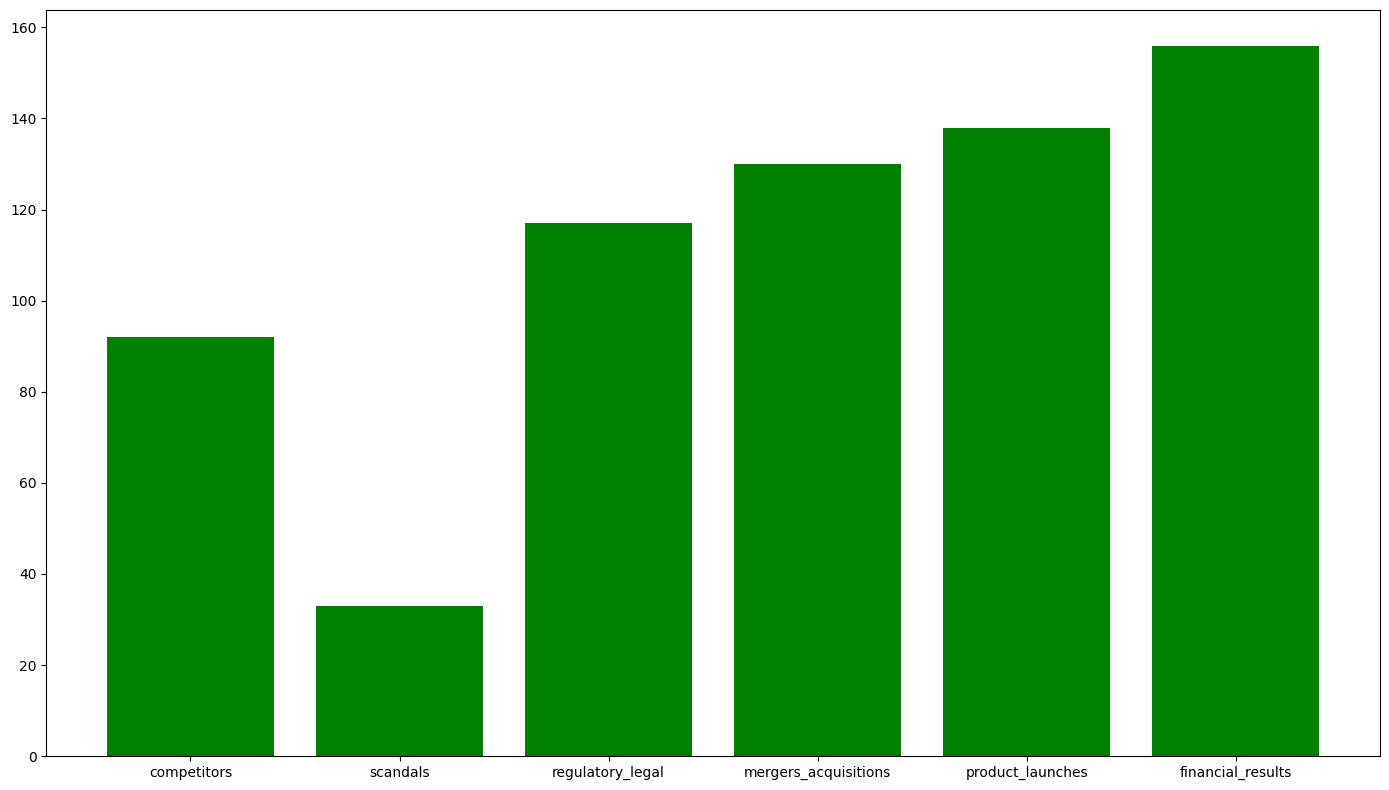

In [25]:
plt.figure(figsize=(14, 8))

plt.bar(['competitors','scandals','regulatory_legal','mergers_acquisitions','product_launches','financial_results'],[92,33,117,130,138,156],color='green')
plt.tight_layout()


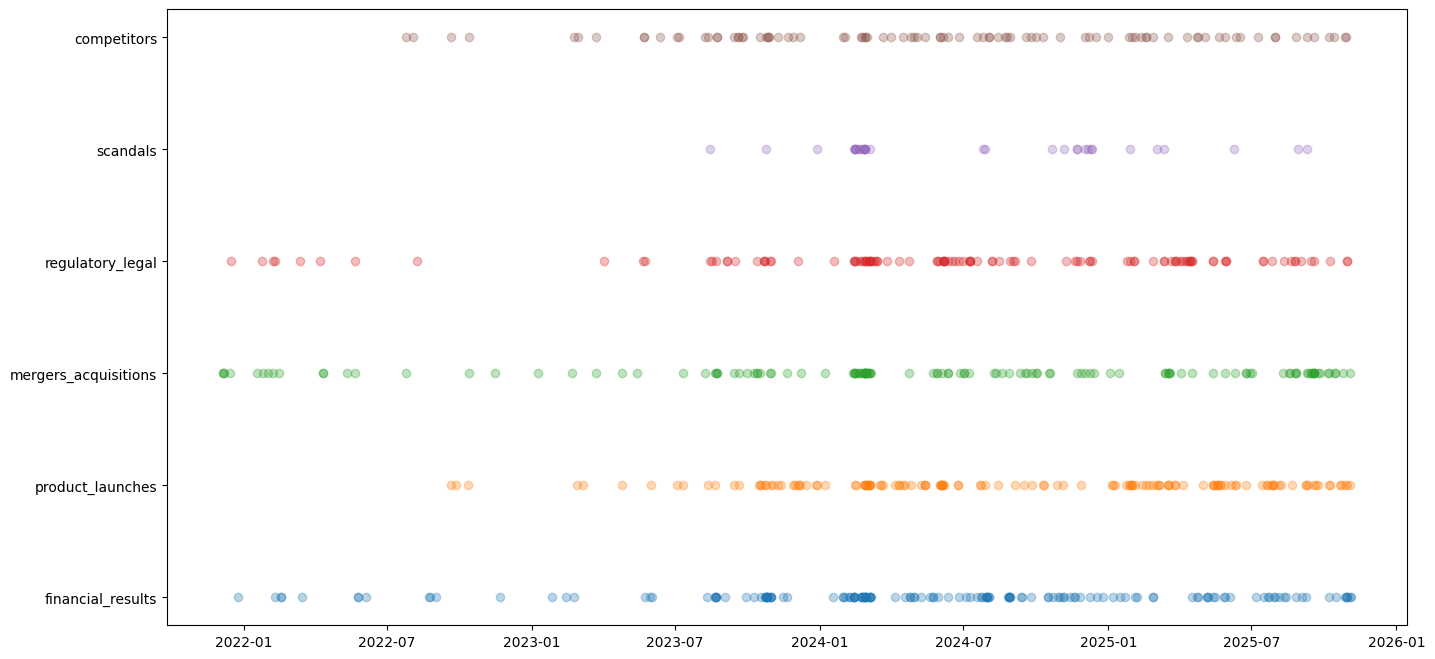

In [ ]:

count_df['publish_date'] = pd.to_datetime(count_df['publish_date'], format='%m/%d/%Y %I:%M:%S %p')
count_df['date_only'] = count_df['publish_date'].dt.strftime('%d %m %Y')
count_df['date_only'] = count_df['publish_date'].dt.date
count_df

categories_eda = ['financial_results', 'product_launches', 'mergers_acquisitions',
              'regulatory_legal', 'scandals', 'competitors']

plt.figure(figsize=(16, 8))

for i, category in enumerate(categories_eda):
    dates_with_category = count_df.loc[count_df[category] == 1, 'date_only']

    y_values = [i] * len(dates_with_category)#высота категории

    plt.scatter(dates_with_category, y_values, alpha=0.3)

plt.yticks(range(len(categories)), categories)
plt.show()

# Выводы первичного анализа распределения новостей по категориям.
Выбраны нормировочные константы (для получения наиболее релевантных статей, а также для сравнения примерно одинаковых долей, делая поправку на специфику категории(например, скандалы в целом имеют много шумных данных, следовательно стоит увеличить их долю, так как их количество с положительным значением и так невелико))

0. Общий вывод: до 2023 года новостей мало, потому что особую популярность и место в инфополе компания получает именно с равзитием ИИ и созданием датацентров, которые можно использовать для обучения моделей, что происходит в первой половине 2023. В 2024 году компания бьёт рекорды по выручке и активно масштабируется, впоследствии количество публикуемых новостей увеличивается.
1. Категория финансовых результатов распределена более равномерно, поскольку компания публикует отчёты для акционеров регулярно.
2. Категория запуска продуктов активизируется главным образом в 2023 году и продолжает рост в 2024 году в связи с масштабированием и внедрением дата центров для обучения нейросетевых моделей.
3. Категория слияний и сделок (покупки компаний, инвестиции, бай-ауты, объединения) актуальна на протяжении всего периода, особенно активизируется в настоящее время - ввиду инвестирования в Open AI и прочих крупных сделок.
4. Категория макроэкономических показатели, правовой сферы и взаимодействия с государством имеет пропуск в 2023 году в связи с тем, что новости в этот период были насыщены спекулятивной, шумной информацией о компании, поводом для которой стали экспортные ограничения и запреты со стороны правительства США.
5. Категория скандалов также главным образом связана с ИИ (его распространение очень противоречиво, есть много противников, в том числе в экологическо сообществе), а также с полупроводниками(борьба за контроль над ресурсами). Как только компания вышла в инфополе - количество противников её развития и информационных спекулянтов возросло.
6. Категория конкуренты распределена относительно равномерно, заметен рост после середины 2023 и пик в 2025, что обсуловлено расширением конкурентной среды от производителей микрочипов до держателей крупнейших дата центров, весь сегмент рынка и смежные с ним - растут.

In [ ]:
print(sum(count_df['competitors']))
print(sum(count_df['scandals']))
print(sum(count_df['regulatory_legal']))
print(sum(count_df['mergers_acquisitions']))
print(sum(count_df['product_launches']))
print(sum(count_df['financial_results']))






92
33
117
130
138
156


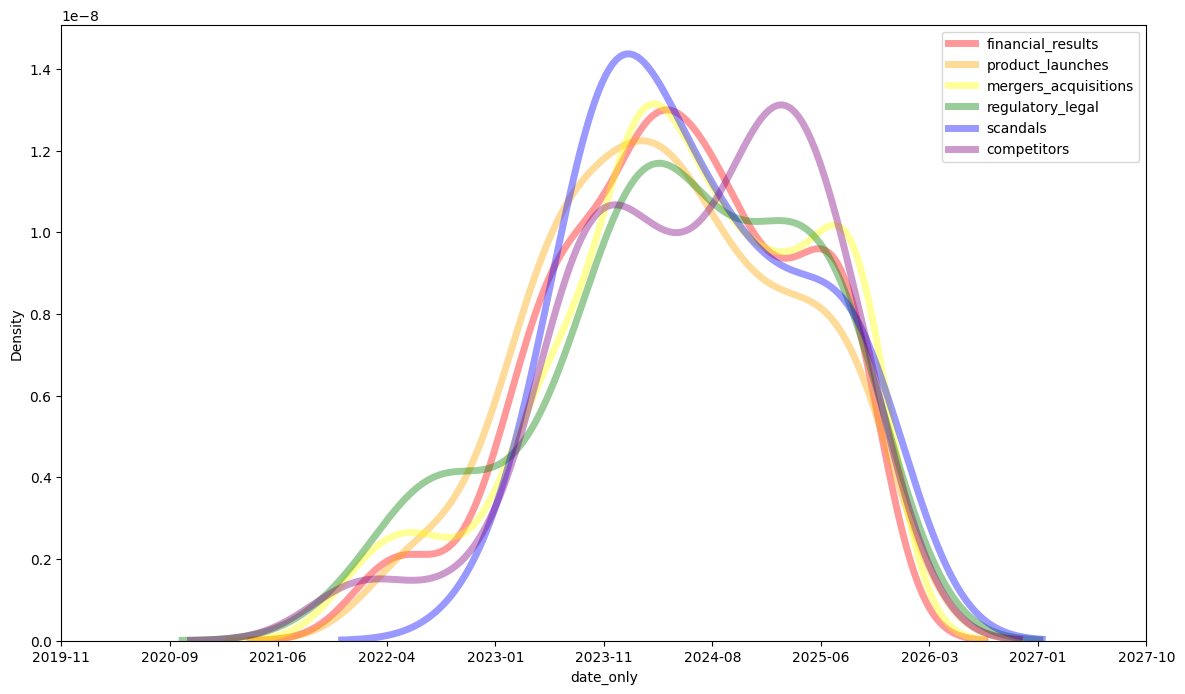

In [ ]:
plt.figure(figsize=(14, 8))

count_df['date_only'] = pd.to_datetime(count_df['date_only'])

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

for i, categories_eda in enumerate(categories):
    data = count_df.loc[df[categories_eda] == 1, 'date_only']

    data_numeric = data.astype('int64') // 10**9

    sns.kdeplot(
        data=data_numeric,
        label=categories_eda,
        color=colors[i],
        linewidth=5,
        fill=False,
        alpha=0.4
    )

xticks = plt.xticks()[0]
plt.xticks(xticks, [pd.to_datetime(x, unit='s').strftime('%Y-%m') for x in xticks])


plt.legend()
plt.show()

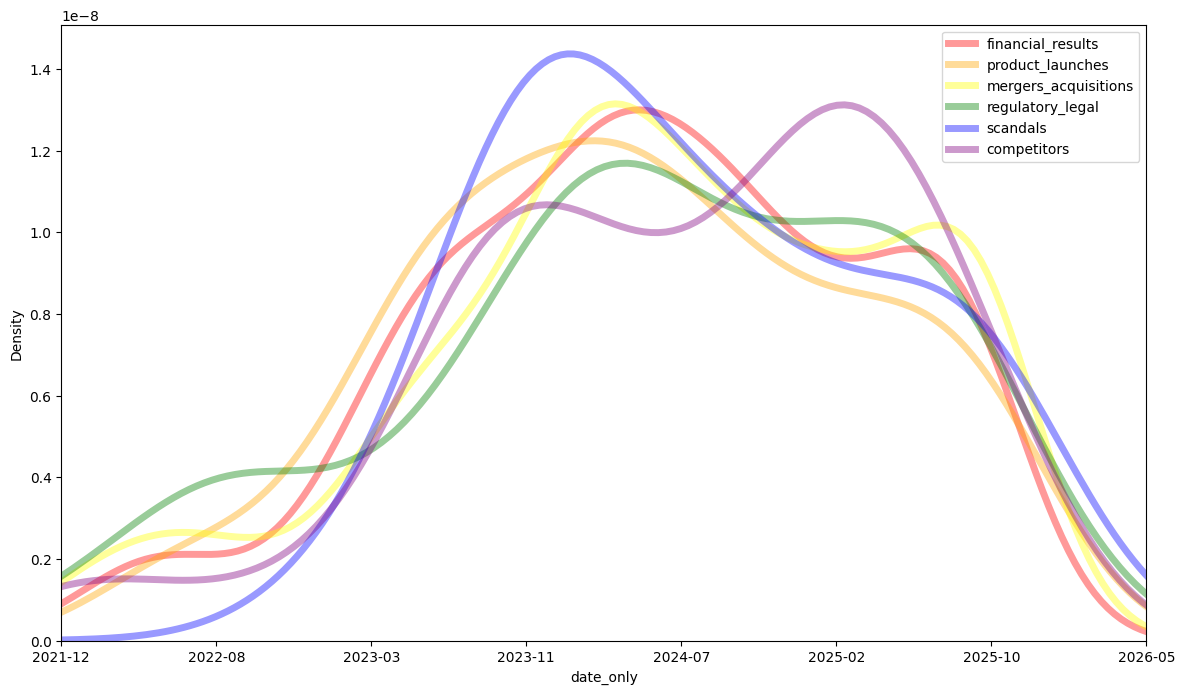

In [ ]:
plt.figure(figsize=(14, 8))

count_df['date_only'] = pd.to_datetime(count_df['date_only'])

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

for i, categories_eda in enumerate(categories):
    data = count_df.loc[df[categories_eda] == 1, 'date_only']

    data_numeric = data.astype('int64') // 10**9

    sns.kdeplot(
        data=data_numeric,
        label=categories_eda,
        color=colors[i],
        linewidth=5,
        fill=False,
        alpha=0.4
    )
plt.xlim(pd.Timestamp('2022-01-01').timestamp(), pd.Timestamp('2025-12-31').timestamp())

xticks = plt.xticks()[0]
plt.xticks(xticks, [pd.to_datetime(x, unit='s').strftime('%Y-%m') for x in xticks])


plt.legend()
plt.show()

# Анализ зависимостей новостей и котировок на акции NVDA


In [ ]:
stock_data = pd.read_csv("nvda_stock_prices.csv")
stock_data

,date,open,close,volume,change_pct
0,2015-01-02,0.483159,0.483159,118406027,0.000000
1,2015-01-05,0.483159,0.474980,206168066,-1.692817
2,2015-01-06,0.475680,0.460533,205985705,-3.184284
3,2015-01-07,0.463977,0.459303,335184616,-1.007378
4,2015-01-08,0.464677,0.476689,295577911,2.585021
...,...,...,...,...,...
2727,2025-11-05,198.770000,195.210000,171350332,-1.791015
2728,2025-11-06,196.420000,188.080000,223029778,-4.246003
2729,2025-11-07,184.900000,188.150000,264942255,1.757707
2730,2025-11-10,195.110000,199.050000,198897134,2.019374


In [ ]:
# БЛОК 1: Подготовка данных
stock_data['date'] = pd.to_datetime(stock_data['date'])
news_data['publish_date'] = pd.to_datetime(news_data['publish_date'])
stock_data = stock_data.sort_values('date')
news_data = news_data.sort_values('publish_date')

stock_data['abs_change_pct'] = abs(stock_data['change_pct'])

/tmp/ipython-input-4281117280.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  news_data['publish_date'] = pd.to_datetime(news_data['publish_date'])


In [ ]:
# БЛОК 2: Находим дни со скачками цены (топ 20% по волатильности)
threshold = np.percentile(stock_data['abs_change_pct'], 80)
jump_dates = stock_data[stock_data['abs_change_pct'] >= threshold]['date'].tolist()

print('Найдено дней со скачками:', len(jump_dates))
print('Порог скачка:', round(threshold, 3))

Найдено дней со скачками: 547
Порог скачка: 2.72


In [ ]:
# БЛОК 3: Сопоставляем скачки с новостями и создаем объединенный датасет
jump_news_data = []
all_news_data = []

categories = ['financial_results', 'product_launches', 'mergers_acquisitions',
              'regulatory_legal', 'scandals', 'competitors']

# Данные для скачков
for jump_date in jump_dates:
    day_news = news_data[news_data['publish_date'].dt.date == jump_date.date()]

    if not day_news.empty:
        change_pct = stock_data[stock_data['date'] == jump_date]['change_pct'].iloc[0]
        abs_change = abs(change_pct)
        categories_present = []
        for category in categories:
            if day_news[category].sum() > 0:
                categories_present.append(category)

        jump_news_data.append({
            'date': jump_date,
            'change_pct': change_pct,
            'abs_change': abs_change,
            'categories': categories_present
        })
# Данные для всех новостей
for idx, news_row in news_data.iterrows():
    news_date = news_row['publish_date']
    stock_match = stock_data[stock_data['date'].dt.date == news_date.date()]

    if not stock_match.empty:
        change_pct = stock_match['change_pct'].iloc[0]

        active_categories = []
        for category in categories:
            if news_row[category] > 0:
                active_categories.append(category)

        if active_categories:
            all_news_data.append({
                'date': news_date,
                'change_pct': change_pct,
                'categories': active_categories
            })

jump_analysis_df = pd.DataFrame(jump_news_data)
all_analysis_df = pd.DataFrame(all_news_data)

print('Дней со скачками и новостями:', len(jump_analysis_df))
print('Всего новостей с данными о цене:', len(all_analysis_df))

Дней со скачками и новостями: 80
Всего новостей с данными о цене: 583


In [ ]:
# БЛОК 4: Анализ коэффициента влияния
category_in_jump_days = {}
category_in_all_days = {}

for category in categories:
    # Подсчет для дней скачков
    count_in_jumps = 0
    for idx, row in jump_analysis_df.iterrows():
        if category in row['categories']:
            count_in_jumps += 1

    total_jumps = len(jump_analysis_df)
    jump_percentage = (count_in_jumps / total_jumps) * 100 if total_jumps > 0 else 0

    category_in_jump_days[category] = {
        'count': count_in_jumps,
        'percentage': jump_percentage
    }

    # Подсчет для всех дней
    count_in_all = 0
    for idx, row in all_analysis_df.iterrows():
        if category in row['categories']:
            count_in_all += 1

    total_all = len(all_analysis_df)
    all_percentage = (count_in_all / total_all) * 100 if total_all > 0 else 0

    category_in_all_days[category] = {
        'count': count_in_all,
        'percentage': all_percentage
    }

# Расчет коэффициента влияния
impact_coefficient = {}
for category in categories:
    if category_in_jump_days[category]['percentage'] > 0 and category_in_all_days[category]['percentage'] > 0:
        jump_pct = category_in_jump_days[category]['percentage']
        all_pct = category_in_all_days[category]['percentage']
        coefficient = jump_pct / all_pct
        impact_coefficient[category] = coefficient

Коэффициенты влияния рассчитаны


In [ ]:
# БЛОК 5: Анализ реального изменения цены
category_price_analysis = {}

for category in categories:
    # Собираем все изменения цены для этой категории
    price_changes = []
    positive_count = 0
    negative_count = 0
    total_count = 0

    for idx, row in all_analysis_df.iterrows():
        if category in row['categories']:
            change = row['change_pct']
            price_changes.append(change)
            total_count += 1
            if change > 0:
                positive_count += 1
            elif change < 0:
                negative_count += 1

    if price_changes:
        avg_change = np.mean(price_changes)
        median_change = np.median(price_changes)
        std_change = np.std(price_changes)
        positive_ratio = (positive_count / total_count) * 100
        negative_ratio = (negative_count / total_count) * 100

        category_price_analysis[category] = {
            'avg_change': avg_change,
            'median_change': median_change,
            'std_change': std_change,
            'positive_ratio': positive_ratio,
            'negative_ratio': negative_ratio,
            'total_count': total_count
        }

print('Анализ ценовых изменений завершен')

Анализ ценовых изменений завершен


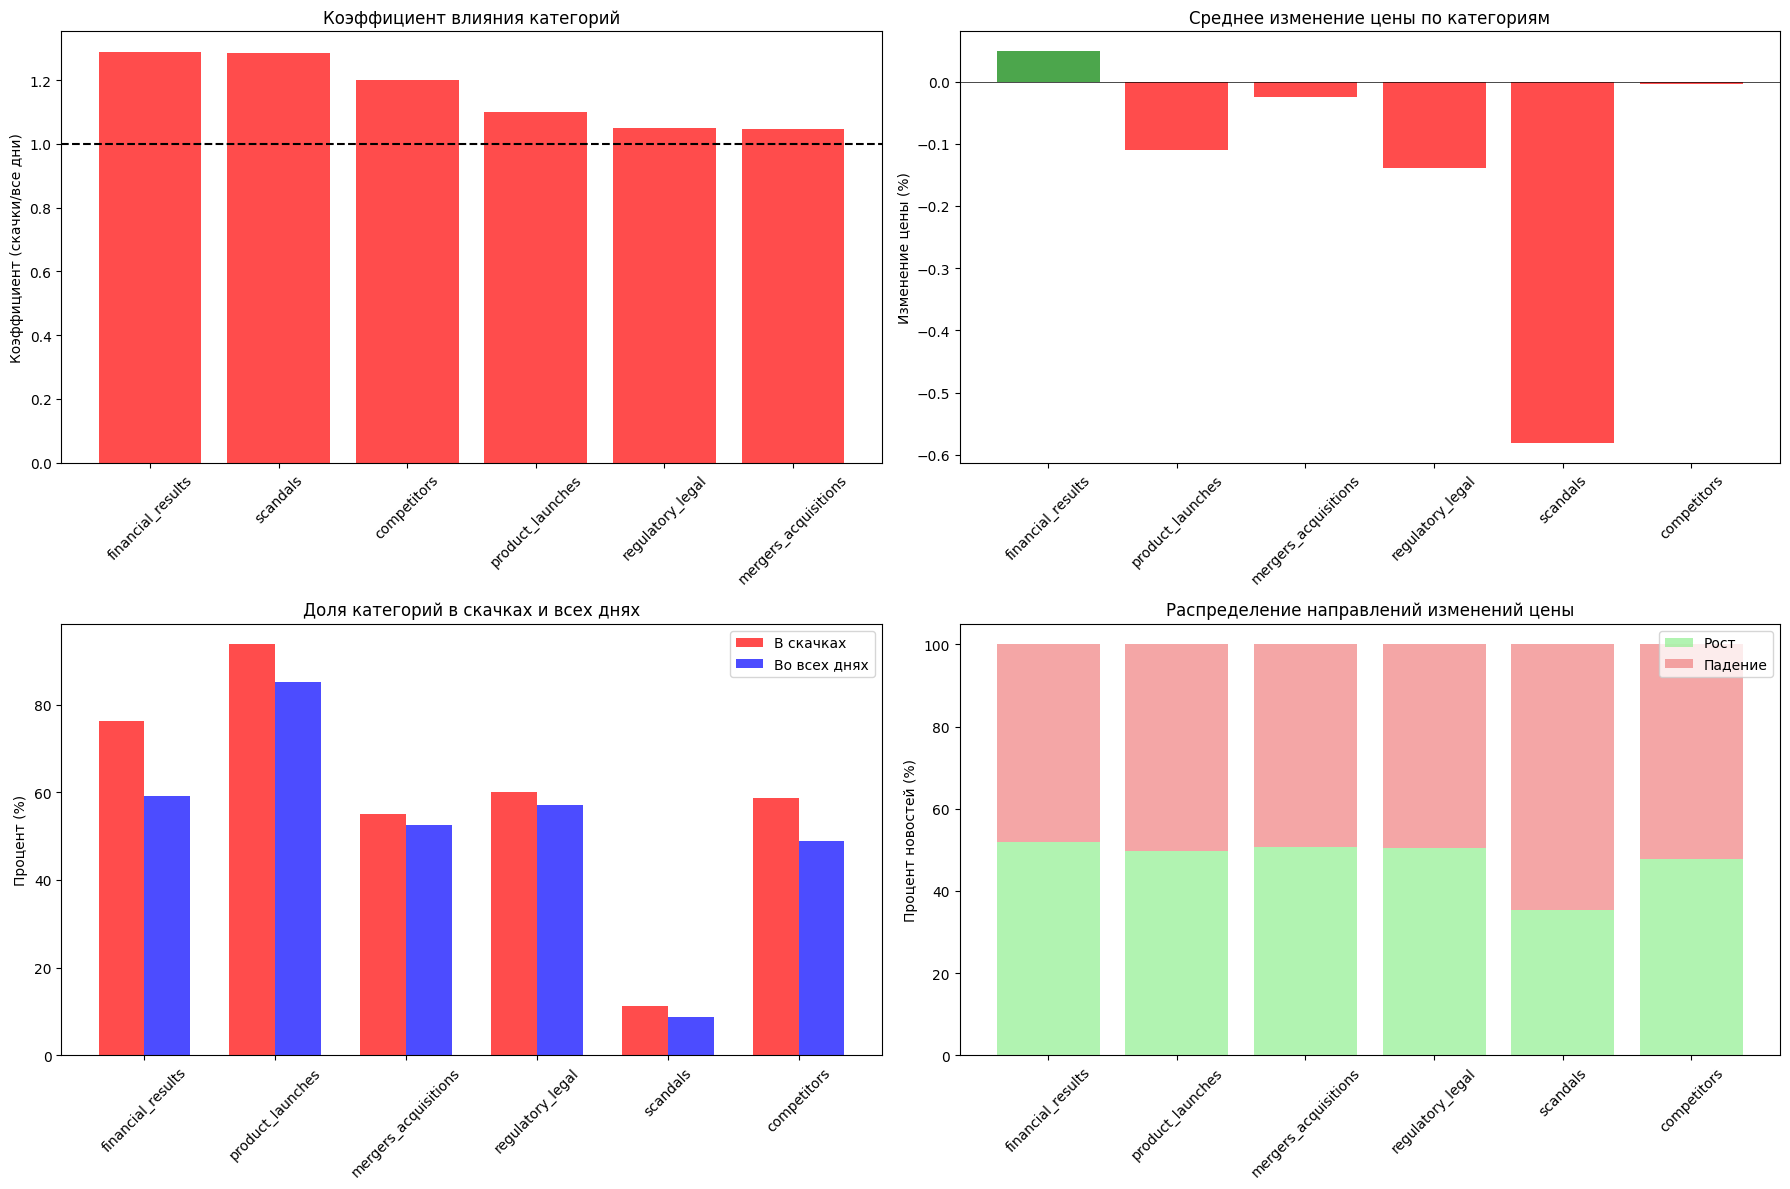

In [ ]:
# БЛОК 6: Визуализация комбинированных результатов
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Коэффициент влияния
if impact_coefficient:
    impact_series = pd.Series(impact_coefficient).sort_values(ascending=False)
    colors = ['red' if score > 1 else 'blue' for score in impact_series.values]
    bars1 = ax1.bar(impact_series.index, impact_series.values, color=colors, alpha=0.7)
    ax1.axhline(y=1.0, color='black', linestyle='--')
    ax1.set_title('Коэффициент влияния категорий')
    ax1.set_ylabel('Коэффициент (скачки/все дни)')
    ax1.tick_params(axis='x', rotation=45)

# Среднее изменение цены
avg_changes = [category_price_analysis[cat]['avg_change'] for cat in categories if cat in category_price_analysis]
category_names = [cat for cat in categories if cat in category_price_analysis]
colors = ['green' if x > 0 else 'red' for x in avg_changes]
bars2 = ax2.bar(category_names, avg_changes, color=colors, alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.set_title('Среднее изменение цены по категориям')
ax2.set_ylabel('Изменение цены (%)')
ax2.tick_params(axis='x', rotation=45)

# Доля в скачках vs всех днях
jump_percentages = [category_in_jump_days[cat]['percentage'] for cat in categories]
all_percentages = [category_in_all_days[cat]['percentage'] for cat in categories]

x_pos = np.arange(len(categories))
width = 0.35
bars3a = ax3.bar(x_pos - width/2, jump_percentages, width, color='red', alpha=0.7, label='В скачках')
bars3b = ax3.bar(x_pos + width/2, all_percentages, width, color='blue', alpha=0.7, label='Во всех днях')
ax3.set_title('Доля категорий в скачках и всех днях')
ax3.set_ylabel('Процент (%)')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(categories, rotation=45)
ax3.legend()

# Направление изменений цены
if category_price_analysis:
    positive_ratios = [category_price_analysis[cat]['positive_ratio'] for cat in categories]
    negative_ratios = [category_price_analysis[cat]['negative_ratio'] for cat in categories]

    bars4_positive = ax4.bar(x_pos, positive_ratios, color='lightgreen', alpha=0.7, label='Рост')
    bars4_negative = ax4.bar(x_pos, negative_ratios, bottom=positive_ratios, color='lightcoral', alpha=0.7, label='Падение')

    ax4.set_title('Распределение направлений изменений цены')
    ax4.set_ylabel('Процент новостей (%)')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(categories, rotation=45)
    ax4.legend()

plt.tight_layout()
plt.show()

In [ ]:
# БЛОК 7: Вывод результатов анализа
for category in categories:
    if category in impact_coefficient and category in category_price_analysis:
        impact = impact_coefficient[category]
        price_data = category_price_analysis[category]
        avg_change = price_data['avg_change']

        print(category + ':')
        print('  Коэффициент влияния: ' + str(round(impact, 2)))
        print('  Среднее изменение цены: ' + str(round(avg_change, 2)) + '%')
        print('  Новостей проанализировано: ' + str(price_data['total_count']))
        print('  Процент растущих дней: ' + str(round(price_data['positive_ratio'], 1)) + '%')
        print()

# Находим лучшие и худшие категории
if impact_coefficient and category_price_analysis:

    best_impact_cat = max(impact_coefficient.items(), key=lambda x: x[1])
    print('Чаще всего в скачках участвует: ' + best_impact_cat[0])
    print('Коэффициент: ' + str(round(best_impact_cat[1], 2)))
    print()

    positive_categories = {k: v for k, v in category_price_analysis.items() if v['avg_change'] > 0}
    if positive_categories:
        best_growth_cat = max(positive_categories.items(), key=lambda x: x[1]['avg_change'])
        print('Самый сильный рост : ' + best_growth_cat[0])
        print('Средний рост: +' + str(round(best_growth_cat[1]['avg_change'], 2)) + '%')
        print()

    negative_categories = {k: v for k, v in category_price_analysis.items() if v['avg_change'] < 0}
    if negative_categories:
        worst_drop_cat = min(negative_categories.items(), key=lambda x: x[1]['avg_change'])
        print('Самый сильный спад вызывает: ' + worst_drop_cat[0])
        print('Среднее падение: ' + str(round(worst_drop_cat[1]['avg_change'], 2)) + '%')
        print()

    stable_categories = {k: v for k, v in category_price_analysis.items()
                        if v['total_count'] >= 20 and abs(v['avg_change']) > 0.5}
    if stable_categories:
        most_stable = max(stable_categories.items(),
                         key=lambda x: x[1]['positive_ratio'] if x[1]['avg_change'] > 0 else x[1]['negative_ratio'])
        stability_type = 'рост' if most_stable[1]['avg_change'] > 0 else 'падение'
        stability_percent = most_stable[1]['positive_ratio'] if most_stable[1]['avg_change'] > 0 else most_stable[1]['negative_ratio']
        print('Наиболее предсказуемая категория: ' + most_stable[0])
        print('Направление: ' + stability_type)
        print('Процент совпадений: ' + str(round(stability_percent, 1)) + '%')
        print()

financial_results:
  Коэффициент влияния: 1.29
  Среднее изменение цены: 0.05%
  Новостей проанализировано: 345
  Процент растущих дней: 51.9%

product_launches:
  Коэффициент влияния: 1.1
  Среднее изменение цены: -0.11%
  Новостей проанализировано: 497
  Процент растущих дней: 49.7%

mergers_acquisitions:
  Коэффициент влияния: 1.05
  Среднее изменение цены: -0.02%
  Новостей проанализировано: 306
  Процент растущих дней: 50.7%

regulatory_legal:
  Коэффициент влияния: 1.05
  Среднее изменение цены: -0.14%
  Новостей проанализировано: 333
  Процент растущих дней: 50.5%

scandals:
  Коэффициент влияния: 1.29
  Среднее изменение цены: -0.58%
  Новостей проанализировано: 51
  Процент растущих дней: 35.3%

competitors:
  Коэффициент влияния: 1.2
  Среднее изменение цены: -0.0%
  Новостей проанализировано: 285
  Процент растущих дней: 47.7%

Чаще всего в скачках участвует: financial_results
Коэффициент: 1.29

Самый сильный рост : financial_results
Средний рост: +0.05%

Самый сильный спад 